# Лабараторная №1. Основый предобработки данных 
# Сидорова Елена, Ижко Георгий 3530903/70301

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,1736.0,4<=X<7,female div/dep/mar,4.0,real estate,31.0,own,1.0,unskilled resident,1.0,none,yes,good
499,<0,30.0,existing paid,3857.0,1<=X<4,male div/sep,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
500,no checking,12.0,existing paid,804.0,>=7,male single,4.0,car,38.0,own,1.0,skilled,1.0,none,yes,good
501,<0,45.0,existing paid,1845.0,1<=X<4,male single,4.0,no known property,23.0,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
credit_df.shape

(502, 16)

In [5]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

In [7]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


1 В какой шкале представлены все признаки в наборе?<br>
checking_status Порядковая<br>
duration Абсолютная<br>
credit_history Номинальная<br> 
credit_amount Абсолютная<br>
employment Порядковая<br>
personal_status Номинальная <br>
residence_since Абсолютная<br>
property_magnitude Номинальная<br>
age Абсолютная<br>
housing Номинальная<br>
existing_credits Абсолютная<br>
job Номинальная<br>
num_dependents Абсолютная<br>
own_telephone Номинальная<br>
foreign_worker Номинальная<br>
#class Номинальная<br>

2 Укажите признак с наименьшей дисперсией. - num_dependents

In [9]:
credit_df.var()

duration            1.436e+02
credit_amount       8.085e+06
residence_since     1.325e+00
age                 1.271e+02
existing_credits    3.439e-01
num_dependents      1.396e-01
dtype: float64

3  Среднее какого признака отличается для двух классов сильнее всего?
credit_amount

In [10]:
credit_df.loc[credit_df['class'] == 'good'].mean() -credit_df.loc[credit_df['class'] == 'bad'].mean()

duration             -4.551
credit_amount      -488.429
residence_since      -0.120
age                   3.304
existing_credits      0.099
num_dependents        0.022
dtype: float64

4 В каком классе больше всего skilled работников? - good

In [11]:
res1 = credit_df.loc[credit_df['class'] == 'good']
len(np.where(res1["job"]=="skilled" )[0])

213

In [12]:
res1 = credit_df.loc[credit_df['class'] == 'bad']
len(np.where(res1["job"]=="skilled" )[0])

107

5 Есть ли в наборе признаки с выбросами? Какие?

duration слишком большое время кредита (кредиты на 60 лет и 72 года слишком невозможны)<br>
credit_amount числа возможные<br>
residence_since выбросов нет<br>
age выбросов нет, люди берут кредит в 74 года<br>
existing_credits иметь 4 кредита это сложно, но возможно, это не выброс<br>
num_dependents не выброс, 2 несовершонолетних в семье это норма<br>

In [13]:
credit_df.loc[credit_df['duration'] == 72]

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
180,0<=X<200,72.0,existing paid,5595.0,1<=X<4,male mar/wid,2.0,car,24.0,own,1.0,skilled,1.0,none,yes,bad


<AxesSubplot:xlabel='duration'>

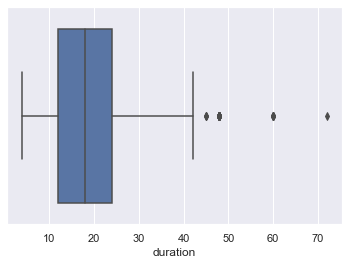

In [14]:
sns.boxplot(x='duration', data=credit_df)

In [15]:
credit_df.loc[credit_df['credit_amount'] > 8000]

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
12,no checking,39.0,existing paid,8588.0,>=7,male single,2.0,car,45.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
52,no checking,48.0,critical/other existing credit,8858.0,4<=X<7,male single,1.0,no known property,35.0,for free,2.0,skilled,1.0,yes,yes,good
66,0<=X<200,36.0,existing paid,12389.0,1<=X<4,male single,4.0,no known property,37.0,for free,1.0,skilled,1.0,yes,yes,bad
118,0<=X<200,48.0,no credits/all paid,12204.0,1<=X<4,male single,2.0,car,48.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
119,0<=X<200,60.0,unknown,9157.0,1<=X<4,male single,2.0,no known property,27.0,for free,1.0,high qualif/self emp/mgmt,1.0,none,yes,good
140,no checking,60.0,unknown,15653.0,4<=X<7,male single,4.0,car,21.0,own,2.0,skilled,1.0,yes,yes,good
156,0<=X<200,36.0,unknown,8086.0,>=7,male single,4.0,car,42.0,own,4.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
160,no checking,48.0,existing paid,10222.0,4<=X<7,male single,3.0,car,37.0,own,1.0,skilled,1.0,yes,yes,good
175,no checking,60.0,existing paid,10366.0,>=7,male single,4.0,life insurance,42.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
187,0<=X<200,36.0,unknown,9857.0,4<=X<7,male single,3.0,life insurance,31.0,own,2.0,unskilled resident,2.0,yes,yes,good


<AxesSubplot:xlabel='credit_amount'>

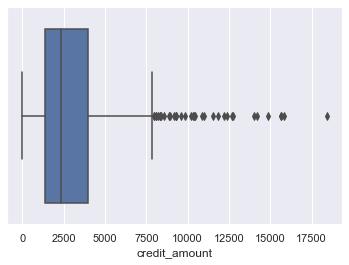

In [16]:
sns.boxplot(x='credit_amount', data=credit_df)
#credit_amount числа возможные

<AxesSubplot:xlabel='residence_since'>

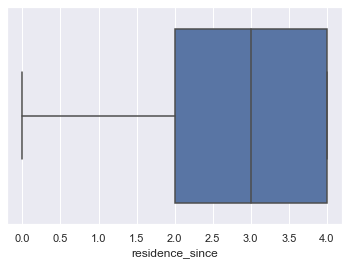

In [18]:
sns.boxplot(x='residence_since', data=credit_df)
#residence_since выбросов нет

<AxesSubplot:xlabel='age'>

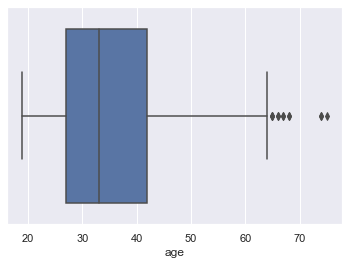

In [19]:
sns.boxplot(x='age', data=credit_df)
#age выбросов нет, люди берут кредит в 74 года

In [20]:
credit_df.loc[credit_df['existing_credits'] > 3]

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
93,<0,12.0,critical/other existing credit,385.0,4<=X<7,female div/dep/mar,3.0,real estate,58.0,own,4.0,unskilled resident,1.0,yes,yes,good
156,0<=X<200,36.0,unknown,8086.0,>=7,male single,4.0,car,42.0,own,4.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
310,no checking,12.0,critical/other existing credit,930.0,>=7,male single,4.0,real estate,65.0,own,4.0,skilled,1.0,none,yes,good
393,<0,27.0,critical/other existing credit,2442.0,>=7,male single,4.0,car,43.0,own,4.0,high qualif/self emp/mgmt,2.0,yes,yes,good


<AxesSubplot:xlabel='existing_credits'>

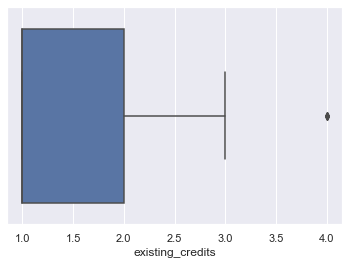

In [21]:
sns.boxplot(x='existing_credits', data=credit_df)
#existing_credits иметь 4 кредита это сложно, но возможно, это не выброс

<AxesSubplot:xlabel='num_dependents'>

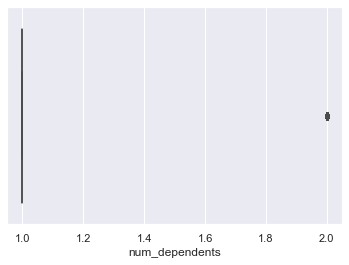

In [22]:
sns.boxplot(x='num_dependents', data=credit_df)
#num_dependents не выброс, 2 несовершонолетних в семье это норма

6 Сколько пропущенных значений в наборе?

In [23]:
credit_df.isnull().sum()
# credit_df.info()

checking_status        0
duration               0
credit_history         0
credit_amount          1
employment             0
personal_status        0
residence_since       17
property_magnitude     0
age                    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

7 Попытайтесь заполнить пропущенные значения.

In [24]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [25]:
#credit_df.fillna(credit_df.mean(), inplace=True)

# credit_df['credit_amount'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
credit_df['credit_amount'].fillna((credit_df['credit_amount']).median(), inplace=True)
credit_df['residence_since'].fillna((credit_df['residence_since']).median(), inplace=True)

credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

8 Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

<AxesSubplot:>

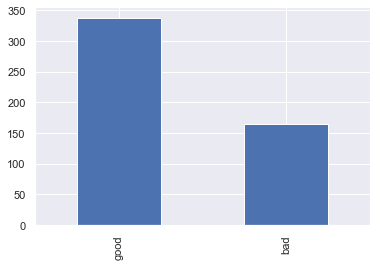

In [26]:
credit_df['class'].value_counts().plot(kind='bar')

<AxesSubplot:>

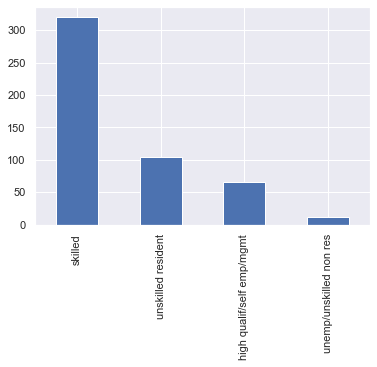

In [27]:
credit_df['job'].value_counts().plot(kind='bar')

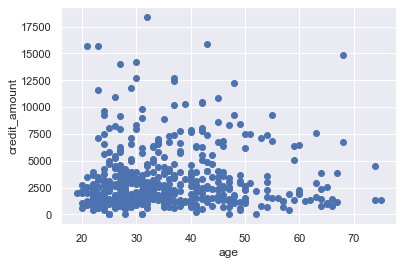

In [28]:
plt.plot(credit_df['age'],credit_df['credit_amount'],'bo')
plt.xlabel('age')
plt.ylabel('credit_amount')
plt.show()

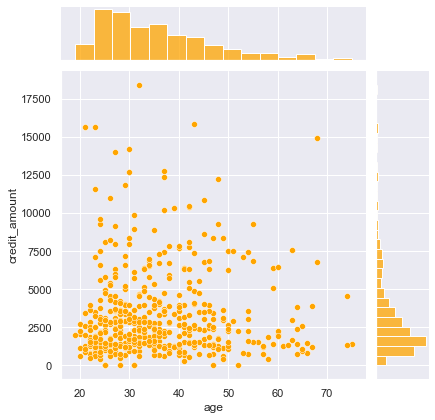

In [30]:
sns.jointplot(x='age', y='credit_amount', data=credit_df, kind='scatter', color='orange')

9 Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
num_dependents - credit_amount: чем больше зависымых от тебя людей - тем меньше сумма кредита<br>
num_dependents - age: чем старше - тем меньше зависимых людей<br>
num_dependents - duration: больше зависимых - большая сумма кредита<br>



credit_amount - existing_credits: чем меньше кол-во кредитов - тем на большую сумму ты берешь кредит<br>
credit_amount - resinence_since: чем дольше являешься клиентос банка - тем больше сумма кредита<br>
credit_amount - age: чем моложе - тем больше шансов взять кредит<br>
credit_amount - duration: чем больше кредит - тем на дольшее время ты его берешь<br>

existing_credits - resinence_since: возможно, чем больше лет ты клиент в банке - появляется возможность взять еще один кредит<br>
existing_credits - age: у людей со средним возрастом больше шанс иметь 2 и более кредита<br>
existing_credits - duration: больше кол-во кредитов - меньше длительность кредита<br>


duration - age: старые берут на небольшую длительность, молодые могут взять на подольше, но в основном берут на небольшой срок <br>

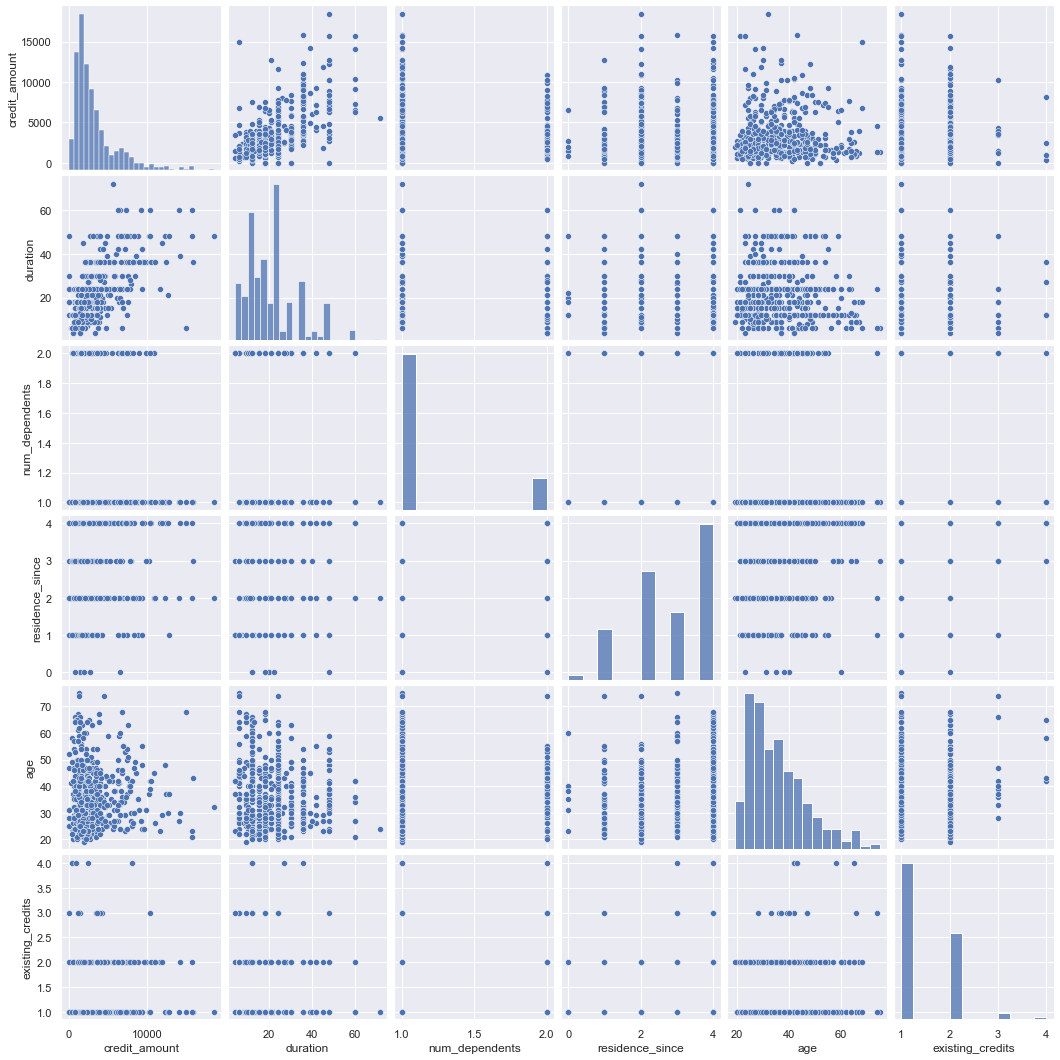

In [31]:
num_columns = list(set(credit_df.columns) -  set(['checking_status','credit_history','employment','personal_status','property_magnitude','housing','job','own_telephone','foreign_worker','class']))
sns.pairplot(credit_df[num_columns])

In [32]:
corr_matrix = credit_df[num_columns].corr()
corr_matrix

,credit_amount,duration,num_dependents,residence_since,age,existing_credits
credit_amount,1.000,0.623,0.018,0.038,0.046,0.026
duration,0.623,1.000,-0.042,0.014,-0.039,0.003
num_dependents,0.018,-0.042,1.000,0.012,0.122,0.116
residence_since,0.038,0.014,0.012,1.000,0.183,0.119
age,0.046,-0.039,0.122,0.183,1.000,0.151
existing_credits,0.026,0.003,0.116,0.119,0.151,1.000


<AxesSubplot:>

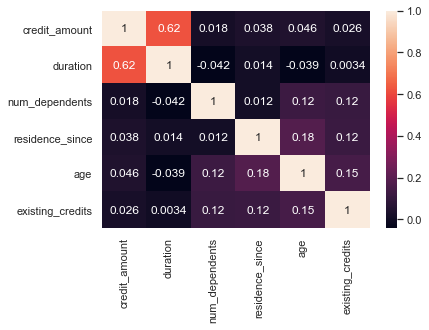

In [33]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

признаки credit amount и duration связаны, чем больше кредит, тем больше длительность

10) Какой признак(и) имеет смысл стандартизировать? Почему?
duration  - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN <br>
credit_amount - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN <br>
residence_since - нет смысла, только 5 значения (от 0 до 4)
age - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN <br>
existing_credits - нет смысла, только 4 значения (от 1 до 4)<br>
num_dependents - нет смысла, только 2 значения (от 1 до 2)  <br>

<br>
11) Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>
количество судимостей - зная количество судимостей, можно одобрить или не одобрить кредит<br>
доход за последние полгода - зная сумму, можно оценить адекватность размера кредита<br>

